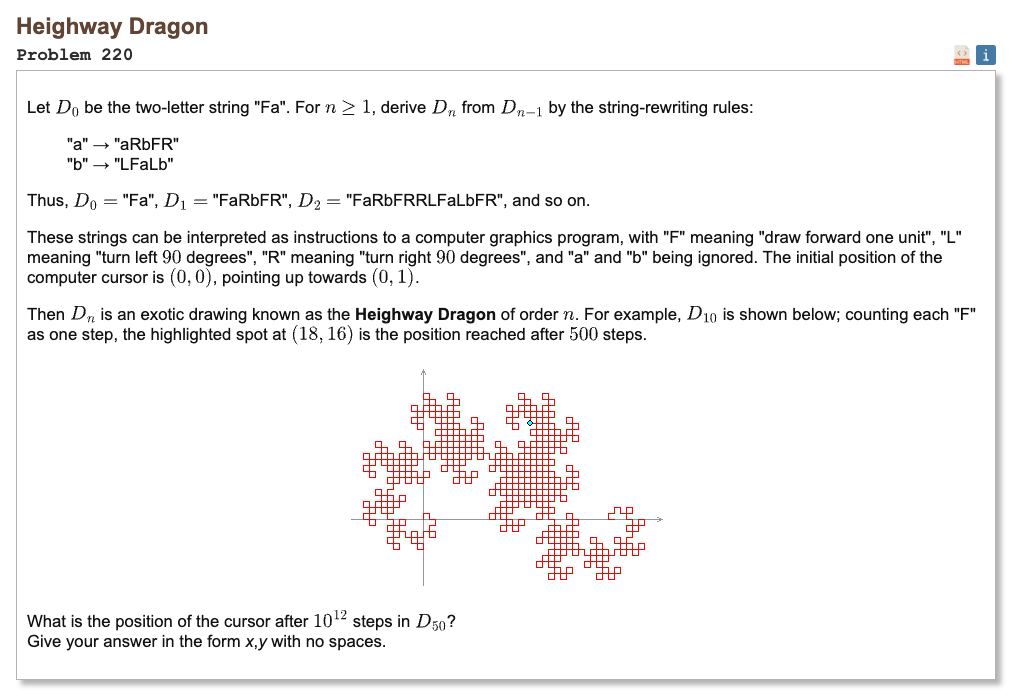

## Initial approach

* treat the string as an l system where only F consumes a step and moves the cursor
* a and b are not drawn but they expand into mixes of a b plus turns and some F moves
* after depth n the total number of F steps produced by a or b is 2^n minus 1, so D_n has 2^n steps because it starts with one extra F
* precompute for every depth and every facing direction the full effect of expanding one a or one b, this gives a displacement vector and final direction
* when you need the position after a huge number of steps, walk the instruction stream but skip whole a or b expansions whenever the remaining steps cover their full step count
* only when remaining steps are smaller than an expansion, recursively descend one level and process the expansion’s rule sequence
* this finishes quickly because you skip almost everything and only descend at most 50 levels

In [1]:
def solve():
    n = 50
    target = 10**12

    def vec(d):
        if d == 0:
            return (0, 1)
        if d == 1:
            return (1, 0)
        if d == 2:
            return (0, -1)
        return (-1, 0)

    count = [0] * (n + 1)
    for k in range(1, n + 1):
        count[k] = 1 + 2 * count[k - 1]

    A = [[(0, 0, d) for d in range(4)] for _ in range(n + 1)]
    B = [[(0, 0, d) for d in range(4)] for _ in range(n + 1)]

    for k in range(1, n + 1):
        for d0 in range(4):
            dx, dy, d = A[k - 1][d0]
            d = (d + 1) % 4
            dx2, dy2, d2 = B[k - 1][d]
            dx += dx2
            dy += dy2
            vx, vy = vec(d2)
            dx += vx
            dy += vy
            d3 = (d2 + 1) % 4
            A[k][d0] = (dx, dy, d3)

            d = (d0 + 3) % 4
            vx, vy = vec(d)
            dx = vx
            dy = vy
            dx2, dy2, d2 = A[k - 1][d]
            dx += dx2
            dy += dy2
            d3 = (d2 + 3) % 4
            dx3, dy3, d4 = B[k - 1][d3]
            dx += dx3
            dy += dy3
            B[k][d0] = (dx, dy, d4)

    rule_a = ["a", "R", "b", "F", "R"]
    rule_b = ["L", "F", "a", "L", "b"]

    def run_tokens(tokens, depth, steps, x, y, d):
        i = 0
        while i < len(tokens) and steps > 0:
            t = tokens[i]
            if t == "F":
                vx, vy = vec(d)
                x += vx
                y += vy
                steps -= 1
            elif t == "L":
                d = (d + 3) % 4
            elif t == "R":
                d = (d + 1) % 4
            elif t == "a":
                if depth > 0:
                    if steps >= count[depth]:
                        dx, dy, d2 = A[depth][d]
                        x += dx
                        y += dy
                        d = d2
                        steps -= count[depth]
                    else:
                        x, y, d, steps = run_tokens(rule_a, depth - 1, steps, x, y, d)
            elif t == "b":
                if depth > 0:
                    if steps >= count[depth]:
                        dx, dy, d2 = B[depth][d]
                        x += dx
                        y += dy
                        d = d2
                        steps -= count[depth]
                    else:
                        x, y, d, steps = run_tokens(rule_b, depth - 1, steps, x, y, d)
            i += 1
        return x, y, d, steps

    x = 0
    y = 0
    d = 0
    steps = target

    if steps > 0:
        vx, vy = vec(d)
        x += vx
        y += vy
        steps -= 1

    x, y, d, steps = run_tokens(["a"], n, steps, x, y, d)

    return x, y

In [2]:
%%time
x, y = solve()
result = f"{x},{y}"
print("Result:", result)

Result: 139776,963904
CPU times: user 1.53 ms, sys: 176 μs, total: 1.71 ms
Wall time: 1.71 ms
